<a href="https://colab.research.google.com/github/Midhilesh4890/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/Spam_or_Ham_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Text Classification Spam Ham.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Taking a length of the messages column to check the difference in character's length of ham and spam messages Generally spam will be more lengthy 

In [5]:
df['length'] = df['Message'].apply(len)
df.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
##Encoding the target variables to 0 and 1 to predict finally
df['Category'] = df['Category'].map({'ham':0,'spam':1})
df.head()

,Category,Message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


Text(0.5, 1.0, 'Number of ham and spam messages')

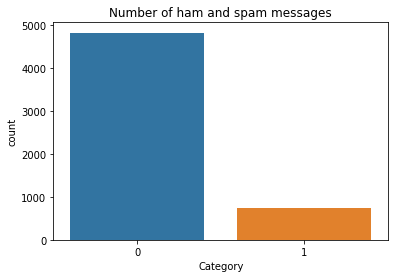

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df.Category)
plt.xlabel('Category')
plt.title('Number of ham and spam messages')
## As expected most of the messages will be ham as in general we get more number of ham messages compared to spam

Text(0, 0.5, 'No of messages')

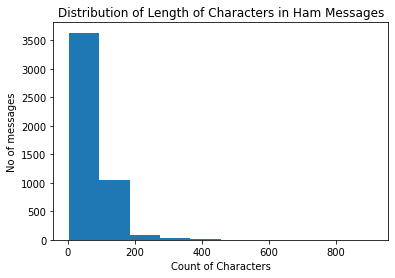

In [8]:
plt.hist(df[df['Category']==0]['Message'].str.len())
plt.title('Distribution of Length of Characters in Ham Messages')
plt.xlabel('Count of Characters')
plt.ylabel('No of messages')

Text(0, 0.5, 'No of messages')

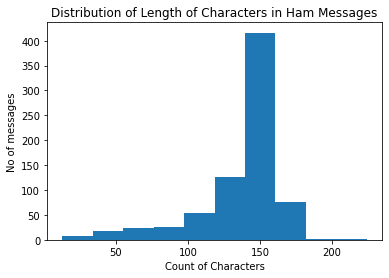

In [9]:
plt.hist(df[df['Category']==1]['Message'].str.len())
plt.title('Distribution of Length of Characters in Ham Messages')
plt.xlabel('Count of Characters')
plt.ylabel('No of messages')

In [10]:
df['Message'].describe()

count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: Message, dtype: object

In [11]:
df.groupby('Category').describe()

length                                                         
           count        mean        std   min    25%    50%    75%    max
Category                                                                 
0         4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
1          747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

Both categories in single visualization to compare effectively

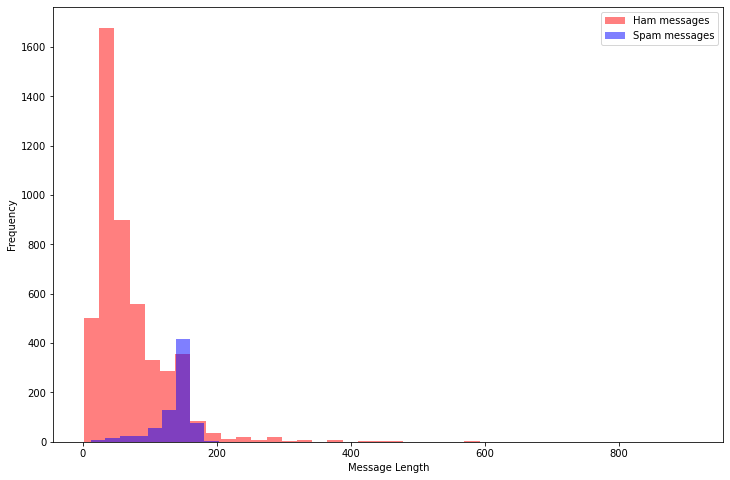

In [12]:
plt.figure(figsize=(12,8))
df.loc[df['Category']==0, 'length'].plot(bins=40, kind='hist', color='red',label='Ham messages',alpha=0.5)
df.loc[df['Category']==1, 'length'].plot(kind='hist', color='blue',label='Spam messages',alpha=0.5)
plt.legend()
plt.xlabel('Message Length')
plt.show()

Text(0.5, 1.0, 'Frequency of Keywords')

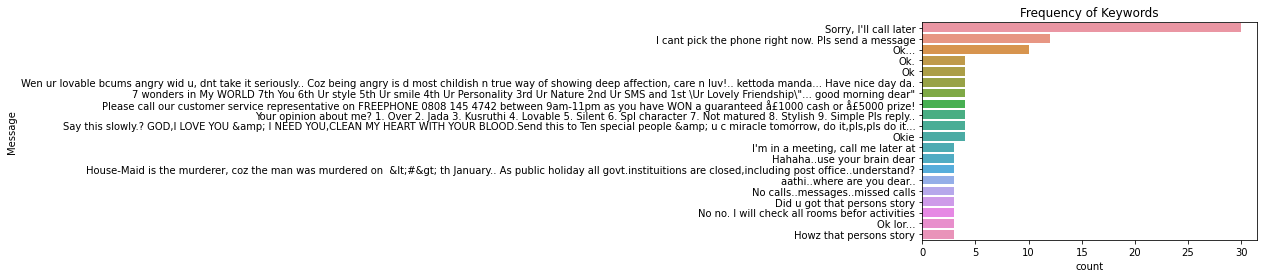

In [13]:
sns.countplot(y=df['Message'],order=df['Message'].value_counts().sort_values(ascending=False).iloc[0:20].index)
plt.title('Frequency of Keywords')


##Some of the messages are frequently occuring with almost same

In [14]:
from nltk.corpus import stopwords
import string
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer 
stop_words = stopwords.words('english')

In [15]:
lemmatizer = WordNetLemmatizer()

Defining user defined function for text cleaning

In [16]:

import re
def clean_txt(sent):
    # Stripping white spaces before and after the text
    sent = sent.strip()
    # Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    # Replacing Non-Alpha-numeric and non space charecters with nothing
    result1 = re.sub("[^\w\s]+", "", result)
    # Normalize case, steam and remove shorter tokens
    tokens = word_tokenize(result1.lower())
    stemmed = [lemmatizer.lemmatize(term) for term in tokens if term not in stop_words and len(term) > 1]
    # Join all to form a single string which will be returned from the UDF
    res = " ".join(stemmed)
    return(res)

In [17]:
df['cleaned_message'] = df['Message'].apply(clean_txt)
df.head()

,Category,Message,length,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis great wo...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts 21s...
3,0,U dun say so early hor... U c already then say...,49,dun say early hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think go usf life around though


In [18]:
df['new_length'] = df['cleaned_message'].apply(len)

In [19]:
##Length has been changed after removing stopwords
df.head()

,Category,Message,length,cleaned_message,new_length
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis great wo...,78
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif oni,21
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts 21s...,133
3,0,U dun say so early hor... U c already then say...,49,dun say early hor already say,29
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think go usf life around though,40


In [20]:
df.drop(['Message','length'],axis=1,inplace=True)

In [21]:
df

,Category,cleaned_message,new_length
0,0,go jurong point crazy available bugis great wo...,78
1,0,ok lar joking wif oni,21
2,1,free entry wkly comp win fa cup final tkts 21s...,133
3,0,dun say early hor already say,29
4,0,nah dont think go usf life around though,40
...,...,...,...
5567,1,2nd time tried contact å750 pound prize claim ...,103
5568,0,ì_ going esplanade fr home,26
5569,0,pity mood soany suggestion,26
5570,0,guy bitching acted like id interested buying s...,81


Using Wordcloud we can easily spot from these kind of small datasets.
Words like Free,offer,reply to this number,mentioning amounts of winning prize money etc;

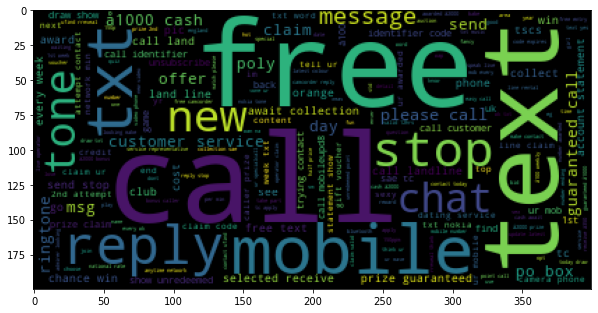

In [22]:
from wordcloud import WordCloud 
spam = ''.join(list(df[df['Category']==1]['cleaned_message']))
spamwordcloud = WordCloud().generate(spam)
plt.figure(figsize=(10,10))
plt.imshow(spamwordcloud)
plt.show()

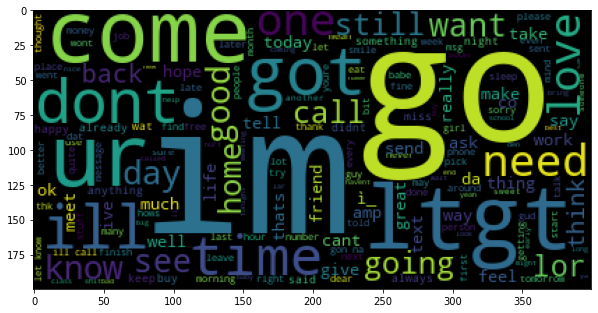

In [23]:
##Ham Messages are normal but still let us check to see what exists in it 
ham = ''.join(list(df[df['Category']==0]['cleaned_message']))
hamwordcloud = WordCloud().generate(ham)
plt.figure(figsize=(10,10))
plt.imshow(hamwordcloud)
plt.show()

In [24]:
spamwords = ''.join(list(df[df['Category']==1]['cleaned_message'])).split(' ')
hamwords = ''.join(list(df[df['Category']==0]['cleaned_message'])).split(' ')

As we checked in wordcloud we also got the same top 10 spam messages are like offers,claiming prizes,money etc

In [25]:
from nltk import FreqDist
fdist_spam = FreqDist(spamwords)
fdist_spam.most_common(15)

[('call', 346),
 ('free', 175),
 ('txt', 148),
 ('text', 132),
 ('mobile', 126),
 ('ur', 124),
 ('claim', 114),
 ('stop', 100),
 ('reply', 96),
 ('prize', 88),
 ('get', 73),
 ('tone', 71),
 ('service', 68),
 ('send', 63),
 ('cash', 62)]

In the wordcloud both have the some common text like 'Send' 'Call' but if we observe the count of such messages
In spam list send 63 times but not there even in top 25 with such a huge list of messages

In [26]:
fdist_ham = FreqDist(hamwords)
fdist_ham.most_common(25)

[('im', 309),
 ('get', 267),
 ('go', 252),
 ('ur', 232),
 ('ltgt', 222),
 ('like', 197),
 ('ill', 197),
 ('got', 194),
 ('come', 187),
 ('dont', 185),
 ('know', 184),
 ('call', 178),
 ('time', 170),
 ('day', 158),
 ('good', 156),
 ('want', 145),
 ('need', 143),
 ('love', 142),
 ('one', 140),
 ('going', 139),
 ('home', 119),
 ('see', 117),
 ('still', 113),
 ('lor', 107),
 ('take', 106)]

In [27]:
corpus = [i for i in df['cleaned_message']]
corpus[:10]

['go jurong point crazy available bugis great world la buffet cine got amore wat',
 'ok lar joking wif oni',
 'free entry wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s',
 'dun say early hor already say',
 'nah dont think go usf life around though',
 'freemsg hey darling week word back id like fun still tb ok xxx std chgs send å150 rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea å900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobile 11 month entitled update latest colour mobile camera free call mobile update co free 08002986030']

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
vectorized_corpus = cv.fit_transform(corpus)
X = vectorized_corpus.todense()
y = df['Category']

In [29]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,stratify=y)

In [30]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

In [31]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)
mnbPrediction = model.predict(X_test)
print('Multinomial Naive Bayes F1 Score :', metrics.f1_score(y_test, mnbPrediction))
print('')
pd.DataFrame(metrics.confusion_matrix(y_test, mnbPrediction),index=[['actual', 'actual'], ['spam', 'ham']], 
             columns=[['predicted', 'predicted'], ['spam', 'ham']])
print('Multinomial Naive Bayes - Classification Report \n', classification_report(y_test, mnbPrediction))

Multinomial Naive Bayes F1 Score : 0.9109947643979058

Multinomial Naive Bayes - Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1206
           1       0.89      0.93      0.91       187

    accuracy                           0.98      1393
   macro avg       0.94      0.96      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [32]:
##Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
mnbModel = MultinomialNB()
mnbModel.fit(X_train, y_train)
mnbModel.score(X_test, y_test)
mnbPrediction = mnbModel.predict(X_test)
print('Multinomial Naive Bayes F1 Score :', metrics.f1_score(y_test, mnbPrediction))
print('')

print('Multinomial Naive Bayes - Classification Report \n', classification_report(y_test, mnbPrediction))

pd.DataFrame(metrics.confusion_matrix(y_test, mnbPrediction),index=[['actual', 'actual'], ['spam', 'ham']], 
             columns=[['predicted', 'predicted'], ['spam', 'ham']])

Multinomial Naive Bayes F1 Score : 0.9109947643979058

Multinomial Naive Bayes - Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1206
           1       0.89      0.93      0.91       187

    accuracy                           0.98      1393
   macro avg       0.94      0.96      0.95      1393
weighted avg       0.98      0.98      0.98      1393



predicted     
                 spam  ham
actual spam      1185   21
       ham         13  174

In [33]:
# logistic regression classifier
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression()
logRegModel.fit(X_train, y_train)
logRegPrediction = logRegModel.predict(X_test)

print('Logistic Regression F1 Score :', metrics.f1_score(y_test, logRegPrediction))
print('')

print('Logistic Regression - Classification Report \n', classification_report(y_test, logRegPrediction))

# cross-validation using confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_test, logRegPrediction),index=[['actual', 'actual'], ['spam', 'ham']],
             columns=[['predicted', 'predicted'], ['spam', 'ham']])

Logistic Regression F1 Score : 0.9127906976744187

Logistic Regression - Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1206
           1       1.00      0.84      0.91       187

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



predicted     
                 spam  ham
actual spam      1206    0
       ham         30  157

In [34]:
scoring = {'accuracy':metrics.make_scorer(metrics.accuracy_score), 
           'precision':metrics.make_scorer(metrics.precision_score),
           'recall':metrics.make_scorer(metrics.recall_score), 
           'f1_score':metrics.make_scorer(metrics.f1_score)}

We can take it as a template of this so that it is easy to do crossvalidation of 10 models at a time


In [35]:

def modelPerformanceEvaluation(X, Y, cvFolds):
  MNB = cross_validate(mnbModel, X, Y, cv=cvFolds, scoring=scoring)
  logReg = cross_validate(logRegModel, X, Y, cv=cvFolds, scoring=scoring)
  modelsScoreTable = pd.DataFrame(
        {'Multinomial Naive Bayes': [
            MNB['test_accuracy'].mean(),
            MNB['test_precision'].mean(),
            MNB['test_recall'].mean(),
            MNB['test_f1_score'].mean()
        ],
        'Logistic Regression': [
            logReg['test_accuracy'].mean(),
            logReg['test_precision'].mean(),
            logReg['test_recall'].mean(),
            logReg['test_f1_score'].mean()
        ]},
        index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
  modelsScoreTable['Best Score'] = modelsScoreTable.idxmax(axis=1)
  return modelsScoreTable

modelPerformanceEvaluation(X_train, y_train, 10)

,Multinomial Naive Bayes,Logistic Regression,Best Score
Accuracy,0.973201,0.978467,Logistic Regression
Precision,0.877848,0.989742,Logistic Regression
Recall,0.932143,0.848214,Multinomial Naive Bayes
F1 Score,0.903612,0.912723,Logistic Regression


Sometimes we build more than 15 models for a dataset to notice the perfomance of various metrics of the models
Then we can use this kind of functions for easy understanding

Multinomial NB  - Spam Messages: ROC AUC = 0.957
Logistic Regression  - Spam Messages: ROC AUC = 0.920


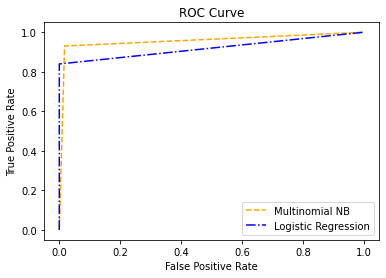

In [36]:
def roc_aucCurve(X, Y, testPrediction, classifier):
    spam_auc = roc_auc_score(y_test, testPrediction)

    print(classifier, ' - Spam Messages: ROC AUC = %.3f' % (spam_auc))

    spamFalsePos, spamTruePos, _ = roc_curve(y_test, testPrediction)
    return [spamFalsePos, spamTruePos]

res = roc_aucCurve(X_train, y_train, mnbPrediction, 'Multinomial NB')
plt.plot(res[0], res[1], linestyle='--', color='orange', label='Multinomial NB')

res = roc_aucCurve(X_train, y_train, logRegPrediction, 'Logistic Regression')
plt.plot(res[0], res[1], linestyle='dashdot', color='blue', label='Logistic Regression')

plt.title('ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')

plt.show()